# Data Preparation
This Jupyter Notebook demonstrates the steps in order to preprocess the data in order to use them after to train the models - algorithms

## 1. Importing Libraries

In [24]:
import numpy as np
import pandas as pd

## 2. Load dataset 

In [25]:
data = pd.read_csv('real_data.csv')
data.head() 

,Emotion,RGB1_R,RGB1_G,RGB1_B,RGB2_R,RGB2_G,RGB2_B,RGB3_R,RGB3_G,RGB3_B
0,Bright,229,0,13,225,225,255,253,166,74
1,Festive,229,0,13,225,225,255,255,242,0
2,Lively,229,0,13,225,225,255,26,67,155
3,Hot,229,0,13,138,112,12,255,242,0
4,Vigorous,229,0,13,255,242,0,12,32,120


In [26]:
print("Dataset shape:", data.shape)
print("Unique emotions:", data['Emotion'].unique())
# Calculate the number of unique emotions
num_unique_emotions = data['Emotion'].nunique()
print("Number of unique emotions:", num_unique_emotions)
print("Emotion distribution:\n", data['Emotion'].value_counts())

Dataset shape: (1069, 10)
Unique emotions: ['Bright' 'Festive' 'Lively' 'Hot' 'Vigorous' 'Bold' 'Forceful' 'Dynamic'
 'Dynamic and Active' 'Rich' 'Mature' 'Alluring' 'Untamed  ' 'Glossy    '
 'Fascinating' 'Luxurious ' 'Mellow ' 'Sweet ' 'Cheerful' 'Childlike'
 'Joyful ' 'Merry ' 'Colourful' 'Brilliant' 'Sweet' 'Pretty' 'Sunny  '
 'Generous' 'Sweet and Dreamy' 'Sweet - Sour' 'Cute' 'Feminine'
 'Agreeable to the touch' 'Amiable ' 'Innocent ' 'Smooth ' 'Gentle '
 'Supple ' 'Sweet and Dreamy ' 'Soft ' 'Charming' 'Smooth' 'Amiable'
 'Gentle and Elegant ' 'Mild ' 'Genteed' 'Pleasant ' 'Mild   ' 'Tender  '
 'Generous  ' 'Emotional  ' 'Casual ' 'Graceful  ' 'Gentle and Elegant'
 'Calm ' 'Sedate' 'Nostalgic' 'Japanese ' 'Elegant ' 'Sleek ' 'Delicious'
 'Nostalgic ' 'Mature ' 'Interesting' 'Diligent ' 'Alluring '
 'Extravagant' 'Mellow  ' 'Ethnic  ' 'Tasteful ' 'Rich  ' 'Luxurious'
 'Robust  ' 'Dynamic and Active ' 'Untamed ' 'Fruitful ' 'Elaborate '
 'Traditional' 'Substantial ' 'Heavy and Dee

In [27]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

if len(duplicate_rows) > 0:
    print("Duplicate rows found:")
    print(duplicate_rows)
    print("Total number of duplicate rows:", len(duplicate_rows))
else:
    print("No duplicate rows found.")

Duplicate rows found:
                       Emotion  RGB1_R  RGB1_G  RGB1_B  RGB2_R  RGB2_G  \
166                      Calm      149      78      29     210     168   
242                  Pleasant      234     124     104     208     194   
273   Simple Quiet and Elegant     149      78      29     161     161   
340                     Plain      208     194     142     230     245   
347                  Wholesome     215     144      92     255     250   
400               Lighthearted     153     166      74     255     250   
458                Interesting     166     151      51      47     105   
523                      Neat      191     230     200     255     255   
530                   Friendly     215     144      92     208     194   
616                     Clear      192     230     184     255     255   
634                      Quiet     222     222     222     153     194   
645            Pure and Simple     153     194     181     217     228   
689             

In [28]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Save the updated dataset to a new CSV file
data.to_csv('preprocess_data.csv', index=False)

# Check for duplicate rows again
duplicate_rows = data[data.duplicated()]

if len(duplicate_rows) > 0:
    print("Duplicate rows found:")
    print(duplicate_rows)
    print("Total number of duplicate rows:", len(duplicate_rows))
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [29]:
# Load the dataset
data = pd.read_csv('preprocess_data.csv')

# Group the data by RGB values and filter groups with multiple emotions
grouped_data = data.groupby(['RGB1_R', 'RGB1_G', 'RGB1_B', 'RGB2_R', 'RGB2_G', 'RGB2_B', 'RGB3_R', 'RGB3_G', 'RGB3_B'])
multiple_emotions = grouped_data.filter(lambda x: len(x['Emotion'].unique()) > 1)

if len(multiple_emotions) > 0:
    print("RGB values corresponding to more than one emotional category were found:")
    for _, group in multiple_emotions.groupby(['RGB1_R', 'RGB1_G', 'RGB1_B', 'RGB2_R', 'RGB2_G', 'RGB2_B', 'RGB3_R', 'RGB3_G', 'RGB3_B']):
        print(group)
        print()
else:
    print("No different emotions found with the same RGB values.")

RGB values corresponding to more than one emotional category were found:
           Emotion  RGB1_R  RGB1_G  RGB1_B  RGB2_R  RGB2_G  RGB2_B  RGB3_R  \
661  Intellectual        4      36      65     222     222     222     116   
976       Youthful       4      36      65     222     222     222     116   

     RGB3_G  RGB3_B  
661     139     116  
976     139     116  

                Emotion  RGB1_R  RGB1_G  RGB1_B  RGB2_R  RGB2_G  RGB2_B  \
1030  Strong and Robust      53      21       3     145     111      93   
1032           Metallic      53      21       3     145     111      93   

      RGB3_R  RGB3_G  RGB3_B  
1030       0       0       0  
1032       0       0       0  

        Emotion  RGB1_R  RGB1_G  RGB1_B  RGB2_R  RGB2_G  RGB2_B  RGB3_R  \
691       Pure       57      89     153     255     255     255     103   
692  Refreshing      57      89     153     255     255     255     103   

     RGB3_G  RGB3_B  
691     195     183  
692     195     183  

         Emo

### Remove emotions with like Pure and Sweety from dataset

In [40]:
# Remove emotions with more than one word
data.loc[:, 'Emotion'] = data['Emotion'].apply(lambda x: x if len(x.split()) == 1 else '')
data = data[data['Emotion'] != '']

print("Emotions with more than one word have been removed.")

Emotions with more than one word have been removed.


In [41]:
# Count the number of occurrences of each distinct emotion
emotion_counts = data['Emotion'].value_counts()

print("Counts of each emotion:")
print(emotion_counts)

# Count the number of distinct emotions
distinct_emotion_count = data['Emotion'].nunique()

print("Number of distinct emotions:")
print(distinct_emotion_count)

emotion_counts.head()

Counts of each emotion:
Emotion
Masculine        9
Brilliant        8
Quiet            8
Urbane           8
Alluring         8
                ..
Extravagant      1
Gorgeous         1
Bitterl          1
Lighthearted     1
Striking         1
Name: count, Length: 336, dtype: int64
Number of distinct emotions:
336


Emotion
Masculine    9
Brilliant    8
Quiet        8
Urbane       8
Alluring     8
Name: count, dtype: int64

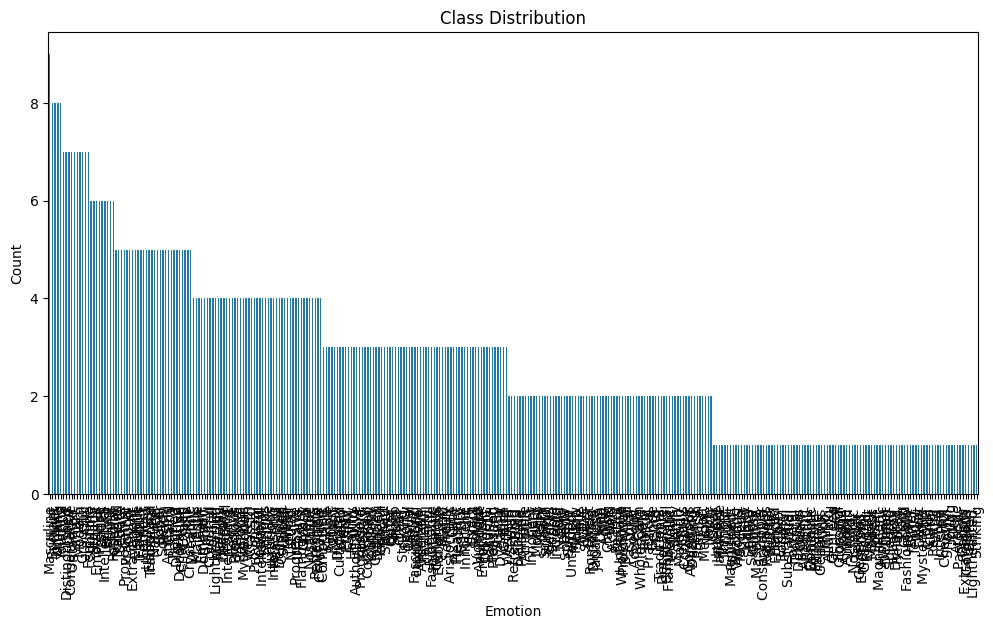

In [42]:
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(12, 6))
data['Emotion'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('real_data.csv')

# Encode the categorical labels
le = LabelEncoder()
df['Emotion'] = le.fit_transform(df['Emotion'])

# Feature Engineering: Aggregating RGB values
df['RGB1_sum'] = df['RGB1_R'] + df['RGB1_G'] + df['RGB1_B']
df['RGB2_sum'] = df['RGB2_R'] + df['RGB2_G'] + df['RGB2_B']
df['RGB3_sum'] = df['RGB3_R'] + df['RGB3_G'] + df['RGB3_B']

# Update feature set
X = df[['RGB1_sum', 'RGB2_sum', 'RGB3_sum']].values
y = df['Emotion'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the minimum class size in the training set
min_class_size = min(np.bincount(y_train))
print(f"Minimum class size: {min_class_size}")

# Handle class imbalance with SMOTE
smote = SMOTE(sampling_strategy='auto', k_neighbors=min(5, min_class_size-1), random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVC model with class weights
svc = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced')
svc.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svc.predict(X_test)

# Print the evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf'],
    'class_weight': ['balanced']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Evaluate the best estimator
best_svc = grid.best_estimator_
y_pred_best = best_svc.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Minimum class size: 0


InvalidParameterError: The 'k_neighbors' parameter of SMOTE must be an int in the range [1, inf) or an object implementing 'kneighbors' and 'kneighbors_graph'. Got -1 instead.